欠損値への対応

In [1]:
#欠損値を含むサンプルDFを用意

import numpy as np

import pandas as pd

df=pd.DataFrame(
  {
    'A':[1,np.nan,3,4,5],
    'B':[6,7,8,np.nan,10],
    'C':[11,12,13,14,15]
  }
)

df

A     B   C
0  1.0   6.0  11
1  NaN   7.0  12
2  3.0   8.0  13
3  4.0   NaN  14
4  5.0  10.0  15

欠損値除去

In [2]:
#手始めに、欠損値があるかどうか確かめる
df.isnull()

A      B      C
0  False  False  False
1   True  False  False
2  False  False  False
3  False   True  False
4  False  False  False

#欠損値が存在する行の除去
df_drop1=df.dropna()
df_drop1

欠損値補完

In [8]:
#1.pandasのfillnaメソッド

#0で補完
df_fillzero=df.fillna(0)
print("0補完")
df_fillzero


0補完
手前の値で補完


A     B   C
0  1.0   6.0  11
1  1.0   7.0  12
2  3.0   8.0  13
3  4.0   8.0  14
4  5.0  10.0  15

In [ ]:
#手前の値で補完
print("手前の値で補完")
df_ffill=df.fillna(method='ffill')
df_ffill

In [9]:
    #平均値で補完
print("平均値で補完")
df_mean = df.fillna(df.mean())
df_mean

平均値で補完


A      B   C
0  1.00   6.00  11
1  3.25   7.00  12
2  3.00   8.00  13
3  4.00   7.75  14
4  5.00  10.00  15

In [11]:
print("scikit-learnのimputeモジュールのSimpleImputerクラスで値補完")
from sklearn.impute import SimpleImputer

#列の平均値で欠損値を補完するインスタンス
imp = SimpleImputer(strategy='mean')
#欠損値補完
imp.fit(df)
imp.transform(df)

scikit-learnのimputeモジュールのSimpleImputerクラスで値補完


array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

**エンコーディング**

カテゴリー変数のエンコーディング

In [19]:
#サンプルデータ
import pandas as pd

df=pd.DataFrame(
  {
    'A':[1,2,3,4,5],
    'B':['a','b','a','b','c']
  }
)
df

A  B
0  1  a
1  2  b
2  3  a
3  4  b
4  5  c

In [20]:
from sklearn.preprocessing import LabelEncoder
#流れはSimpleInputeと同じ
#ラベルエンコーダのインスタンス生成
le=LabelEncoder()
#ラベルのエンコーディング
#B列のAは0、Bは1...に変換
le.fit(df.loc[:,'B'])
le.transform(df.loc[:,'B'])


array([0, 1, 0, 1, 2])

In [21]:
#元の値をとエンコードの対応を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

One-hotエンコーディング(ダミー変数化)

In [26]:
#0/1の二値で表示
#OneHotEncoderの場合

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

#DataFrameをコピー
df_ohe = df.copy()
#インスタンス
le = LabelEncoder()
#a,b,cを1,2,3に変換
df_ohe.loc[:,'B'] = le.fit_transform(df_ohe.loc[:,'B'])

#One*hotエンコーダのインスタンス化
ohe = ColumnTransformer([("OneHotEncoder",
                         OneHotEncoder(),[1])],
                         remainder='passthrough')
#One-hotエンコーディング
df_ohe = ohe.fit_transform(df_ohe)
df_ohe

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

**分類**

In [30]:
from sklearn.datasets import load_iris
#読み込み
iris=load_iris()
X,y=iris.data,iris.target #説明変数と目的変数

In [32]:
#データを学習用とテスト用に分ける
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


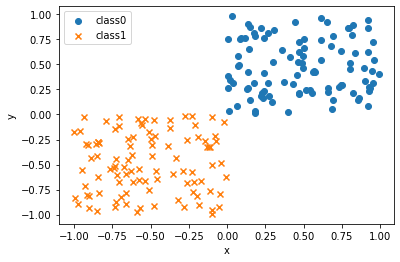

In [35]:
#サポートベクターマシン
#データの用意
import numpy as np
import matplotlib.pyplot as plt

#乱数シードを固定
rng = np.random.default_rng(123)
#0~1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100,2))
y0=np.repeat(0,100) #クラス0のラベルと100個生成

X1 = rng.uniform(-1,0,size=(100,2))
y1 = np.repeat(1,100)

#散布図にプロット
fig,ax = plt.subplots()
ax.scatter(X0[:,0],X0[:,1],
          marker='o',label='class0')
ax.scatter(X1[:,0],X1[:,1],
           marker='x',label='class1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [43]:
from sklearn.svm import SVC
#学習、決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    #SVMのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    #学習
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))
    
    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],
              marker='o',label='class0')
    ax.scatter(X1[:,0],X1[:,1],
              marker='x',label='class1')
    
    #決定境界とマージンをプロット
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(xmin,xmax,100))
    xy = np.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,
              colors='k',levels=[-1,0,1],
              alpha=0.5,linestyles=['--','-','--'])#高さ0，各クラスのサポートベクタを通過する直線の等高線の高さをそれぞれ-1，1
    
    #サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:,0],
              svc.support_vectors_[:,1],
              s=250,facecolors='none',
              edgecolors='black')
    ax.legend(loc='best')
    plt.show()

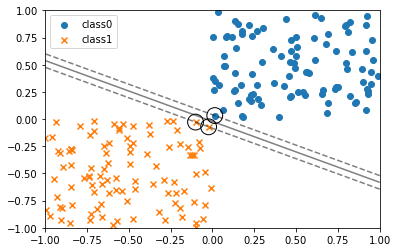

In [44]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=1e6)

**決定木**

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#データセットの準備
iris=load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(
                    X,y,test_size=0.3,random_state=123)

#決定木をインスタンス化
tree=DecisionTreeClassifier(max_depth=3,random_state=123)

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [4]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=12381b2c52b8072c183f2835310e1a73c1107266ec6815fa97f35b88078bfbce
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\85\58\96\6cba53da2c6e8690dd0a33f67a4a0e2e88f70798e9d4955812
Successfully built pydotplus



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#GraphVizで可視化
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#dot形式のデータを抽出
dot_data = export_graphviz(tree,
                           filled=True,
                          rounded=True,
                          class_names=['Setosa','Versicolor','Virginica'],
                          feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width'],
                          out_file = None)
#決定木のプロットを出力
graph= graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [10]:
#予想を行う
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

**ランダムフォレスト**

In [5]:
from sklearn.ensemble import RandomForestClassifier
#ランダムフォレストをインスタンス化する

forest = RandomForestClassifier(n_estimators=100,random_state=123)

#学習
forest.fit(X_train,y_train)
#予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

**回帰分析**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#Californiahousingデータセットを読み込む
housing = fetch_california_housing()
X,y=housing.data,housing.target
#学習データセットとテストデータセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#線形回帰をインスタンス化
lr = LinearRegression()

#学習
lr.fit(X_train,y_train)

#予測
y_pred=lr.predict(X_test)
y_pred

array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

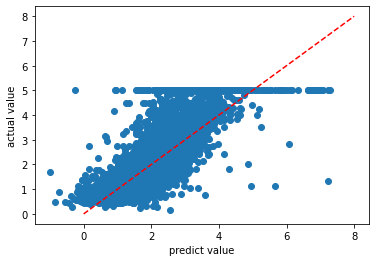

In [5]:
#横軸を予測値、縦軸を実測値とする散布図をプロットする
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.scatter(y_pred,y_test)
#理想値の部分にラインを引く
ax.plot((0,8),(0,8),
       linestyle='dashed',color='red')
ax.set_xlabel('predict value')
ax.set_ylabel('actual value')

plt.show()

**主成分分析**

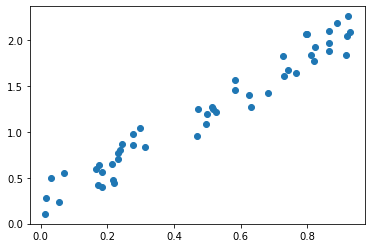

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#サンプルデータ用意
rng=np.random.default_rng(123)
#0以上1未満の一様乱数を50個生成
X=rng.uniform(size=50)
Y = X*2+0.5*rng.uniform(size=50)

#散布図をプロット
fig,ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

In [5]:
from sklearn.decomposition import PCA
#主成分のクラスをインスタンス化

pca=PCA(n_components=2)
#主成分分析を実行
X_pca=pca.fit_transform(np.hstack((X.reshape(-1,1),
                                  Y.reshape(-1,1))))

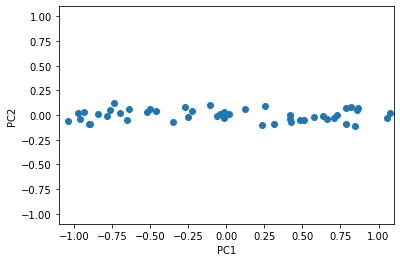

In [6]:
fig,ax = plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)

plt.show()

**予測結果の適合率、再現率、F値の求め方**

In [3]:
#主成分分析のサンプル
from sklearn.datasets import load_iris

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris=load_iris()
X,y = iris.data[:100,:],iris.target[:100]
#学習データセットとテストデータセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
#SVMのインスタンス化
svc=SVC()
#SVMで学習
svc.fit(X_train,y_train)
#テストデータセットの予測
y_pred= svc.predict(X_test)

In [4]:
from sklearn.metrics import classification_report
#適合率、再現率、F値を出力

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
交差検証（k分割交差検証）

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc=SVC()
#10分割交差検証。10個の評価指標を返す
cross_val_score(svc,X,y,cv=10,scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

予測確率の正確さ

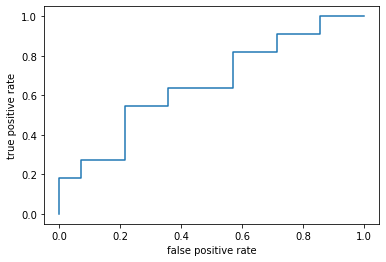

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fpr = np.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14])/14
tpr = np.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11])/11

#ROC曲線をプロット
fig,ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

**ハイパーパラメータの最適化**

In [19]:
#先ほどのirisのデータを使う
#決定木の最適な深さを求める例
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#決定木のインスタンス化
clf = DecisionTreeClassifier(random_state=123)
param_grid={'max_depth':[3,4,5]}
#10分割交差検証を実行
cv = GridSearchCV(clf,param_grid=param_grid,cv=10)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 4, 5]})

In [20]:
#今回の最適な木の深さ
#cv.best_params_

#最適な木の深さ
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=123)

In [21]:
#予測された最適なモデルを用いて予測
y_pred = cv.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0])